In [1]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    s=0
  
    for key, value in freq.items(): 
#         print ("% d : % d"%(key, value)) 
        s+=value
    for key, value in freq.items(): 
        print ("% d : % d"%(key, (value/s)*100)) 
#         s+=value
    

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Environment(object):
    def __init__(self, no_players):
        self.no_players=no_players # No of players playing the game


    def initialize(self):
        self.winner=None           # Winner of the game
        self.roundwinner=None      # Winner of current round
        self.reward=0              # reward
        self.deal=list()           # The deal-selected suit
        self.gold_card=None        # The card selected from the deal
        self.players=dict()        # The cards belonging to all the players
        self.round_=np.zeros(self.no_players)  # The cards played by all the players in this particular round
        self.gold=np.zeros(self.no_players)	   # The gold cards collected byeach player
        self.s=None

        for r in range(13):
            self.deal.append(r+1)
        random.shuffle(self.deal)
        for i in range(self.no_players):
            self.players[i]=[]
            for j in range(13):
                self.players[i].append(j+1)

    def env_act(self):
        self.gold_card=self.deal.pop()
        self.round_=np.zeros((self.no_players))

    def player_act(self,action,playerid):
        self.round_[playerid]=action
        self.players[playerid].remove(action)

    def round_result(self):
        if(self.round_[0]!=self.round_[1]):
            self.roundwinner=np.argmax(self.round_)
            self.gold[self.roundwinner]+=(self.gold_card)
            self.reward=self.gold_card
        # print(roundwinner)
            return self.roundwinner ,self.reward
        else:
            self.roundwinner=-1
#             self.gold[self.roundwinner]+=(self.gold_card)
#             self.reward=self.gold_card
#         # print(roundwinner)
            return self.roundwinner ,self.reward

    def terminate(self):
        if(len(self.deal)==0):
            return True
        return False

    def final_result(self):
        self.winner=np.argmax(self.gold)
        return self.winner

    def state(self):
        self.s=str(self.gold_card)+str(self.players[0])
        return self.s


In [3]:
class randomagent(object):
    def __init__(self,player_id):
        self.player_id=player_id
        # random.seed(1234)

    def action(self, my_cards):
        return (np.random.choice(my_cards))
        # p=np.random.randint(13)
        # while(p not in my_cards):
        #     p=np.random.randint(13)
        # return p

class maxagent(object):
    def __init__(self,player_id):
        self.player_id=player_id
        # random.seed(1234)

    def action(self, my_cards):
        return max(my_cards)
        # p=np.random.randint(13)
        # while(p not in my_cards):
        #     p=np.random.randint(13)
        # return p

class oneupagent(object):
    def __init__(self,player_id):
        self.player_id=player_id
    
    def action(self, gold_card):
        if(gold_card==13):
            return 1
        return gold_card+1

In [4]:
class Agent(object):
    def __init__(self,player_id):
        self.player_id=player_id
        self.epsilon = 0.01
        self.gamma = 1
        self.alpha = 0.01
        self.q=dict()

    def action(self, s, my_cards):
        # return(np.random.choice(my_cards))
#         p=np.random.randint(13)
#         while(p not in my_cards):
#             p=np.random.randint(13)
#         return p
        p = random.random()
        if p < self.epsilon:
            return random.choice(my_cards)
        else:
#             return random.choice(my_cards)
            return self.policy(s, my_cards)

    def greedy_action(self, s, my_cards):
        return self.policy(s, my_cards)
    
    def Q(self, s, a,my_cards):
        if(str([s,a]) not in self.q):
            for ac in my_cards:
                self.q[str([s,ac])] = 0
                # print(str([s,ac]))
        return self.q[str([s,a])]    


    def policy(self, s, my_cards):
        max_value = max([self.Q(s,a,my_cards) for a in my_cards])
        max_actions = [a for a in my_cards if self.Q(s,a,my_cards) == max_value]
        return random.choice(max_actions)


    def update_q(self, s, a, sp, r, my_cards,old_cards):
        max_value = max([self.Q(sp,ac,my_cards) for ac in my_cards])
        max_actions=[ac for ac in my_cards if self.Q(sp,ac,my_cards) == max_value]
        ap=random.choice(max_actions)
        self.q[str([s,a])]=self.Q(s,a,old_cards)+self.alpha*(r+self.gamma*self.q[str([sp,ap])]-self.Q(s,a,old_cards))

In [9]:
def main(agent):
    no_players=2
    # random.seed(0)
    epoch =600001
    env=Environment(no_players)
#     env.initialize()
    
#     agent=Agent(player_id=0)
    ragent=randomagent(player_id=1)
    # print(env.players)
    p=np.zeros(no_players)
    win_per=[]
    for i in range(epoch):
        env.initialize()
        re=np.zeros((no_players))
        while(not env.terminate()):
            
            env.env_act()
            s=env.state()
            pos_actions=env.players[0][:]
            # print(pos_actions)
            a1=agent.action(s,env.players[0])
            env.player_act(a1,0)
            a2=ragent.action(env.players[1])
            env.player_act(a2,1)
            rwin,r=env.round_result()
            if(rwin!=-1):
                re[rwin]+=r
                if(rwin==0):
                    r=env.reward-a1
                else:
                    r=(-1*env.reward)-a1
                sp=env.state()
                # print(s,sp)
                # print(env.gold_card,env.players)
                # print(pos_actions,env.players[0])
                if (env.players[0]!=[]):
                    agent.update_q(s,a1,sp,r,env.players[0],pos_actions)
            else:
                r=-a1
                sp=env.state()
                if (env.players[0]!=[]):
                    agent.update_q(s,a1,sp,r,env.players[0],pos_actions)

        result=np.argmax(re)
#         print(result,np.max(re))
        p[result]+=1
        if(i%500==0and i!=0):
            per=(p[0]/500)*100
            print(i,per,"%")
            print(len(agent.q))
            p=np.zeros(no_players)
            win_per.append(per)
    return win_per

500 55.00000000000001 %
59558
1000 51.0 %
106414
1500 52.6 %
146954
2000 56.00000000000001 %
183223
2500 55.60000000000001 %
216127
3000 59.4 %
245573
3500 57.599999999999994 %
272612
4000 58.4 %
297514
4500 55.800000000000004 %
320919
5000 58.199999999999996 %
342510
5500 62.2 %
362572
6000 59.0 %
381061
6500 63.2 %
398653
7000 57.199999999999996 %
414942
7500 61.6 %
430240
8000 60.4 %
444651
8500 62.6 %
458082
9000 59.0 %
470598
9500 63.800000000000004 %
482709
10000 60.199999999999996 %
493609
10500 57.8 %
504085
11000 61.6 %
514179
11500 65.2 %
523190
12000 60.6 %
532355
12500 58.199999999999996 %
540719
13000 60.6 %
548768
13500 59.4 %
555789
14000 61.4 %
562465
14500 58.8 %
569128
15000 62.0 %
575312
15500 61.8 %
581209
16000 64.2 %
586768
16500 60.8 %
592042
17000 65.0 %
596822
17500 64.4 %
601589
18000 64.4 %
605749
18500 62.4 %
609806
19000 59.8 %
613903
19500 63.800000000000004 %
617677
20000 62.2 %
621366
20500 64.60000000000001 %
624896
21000 62.8 %
628086
21500 65.60000000

178500 70.39999999999999 %
692224
179000 73.0 %
692224
179500 73.0 %
692224
180000 74.6 %
692224
180500 75.6 %
692224
181000 74.4 %
692224
181500 75.2 %
692224
182000 76.0 %
692224
182500 76.0 %
692224
183000 69.19999999999999 %
692224
183500 72.39999999999999 %
692224
184000 72.2 %
692224
184500 73.4 %
692224
185000 75.2 %
692224
185500 75.0 %
692224
186000 72.0 %
692224
186500 72.6 %
692224
187000 75.6 %
692224
187500 70.8 %
692224
188000 75.6 %
692224
188500 70.39999999999999 %
692224
189000 74.0 %
692224
189500 76.2 %
692224
190000 76.0 %
692224
190500 76.8 %
692224
191000 74.4 %
692224
191500 70.6 %
692224
192000 70.0 %
692224
192500 70.6 %
692224
193000 73.2 %
692224
193500 70.19999999999999 %
692224
194000 71.39999999999999 %
692224
194500 70.8 %
692224
195000 73.2 %
692224
195500 73.6 %
692224
196000 72.0 %
692224
196500 73.6 %
692224
197000 66.60000000000001 %
692224
197500 76.0 %
692224
198000 72.8 %
692224
198500 71.39999999999999 %
692224
199000 73.0 %
692224
199500 71.0 %


361500 76.8 %
692224
362000 70.6 %
692224
362500 74.2 %
692224
363000 76.4 %
692224
363500 74.4 %
692224
364000 76.0 %
692224
364500 75.4 %
692224
365000 75.2 %
692224
365500 76.0 %
692224
366000 74.6 %
692224
366500 75.6 %
692224
367000 75.2 %
692224
367500 70.6 %
692224
368000 75.4 %
692224
368500 73.2 %
692224
369000 74.2 %
692224
369500 76.4 %
692224
370000 76.0 %
692224
370500 75.6 %
692224
371000 76.0 %
692224
371500 72.6 %
692224
372000 74.6 %
692224
372500 74.0 %
692224
373000 77.8 %
692224
373500 76.2 %
692224
374000 74.0 %
692224
374500 72.8 %
692224
375000 74.0 %
692224
375500 73.6 %
692224
376000 75.2 %
692224
376500 75.4 %
692224
377000 73.6 %
692224
377500 74.8 %
692224
378000 73.8 %
692224
378500 70.6 %
692224
379000 74.0 %
692224
379500 76.8 %
692224
380000 71.6 %
692224
380500 73.0 %
692224
381000 73.6 %
692224
381500 72.8 %
692224
382000 76.6 %
692224
382500 74.2 %
692224
383000 73.6 %
692224
383500 75.0 %
692224
384000 76.6 %
692224
384500 76.2 %
692224
385000 73.4 %

549000 75.4 %
692224
549500 74.6 %
692224
550000 77.0 %
692224
550500 76.2 %
692224
551000 77.2 %
692224
551500 74.2 %
692224
552000 74.6 %
692224
552500 75.8 %
692224
553000 72.2 %
692224
553500 76.2 %
692224
554000 77.4 %
692224
554500 72.39999999999999 %
692224
555000 71.8 %
692224
555500 72.8 %
692224
556000 71.0 %
692224
556500 78.0 %
692224
557000 71.6 %
692224
557500 75.6 %
692224
558000 74.8 %
692224
558500 78.2 %
692224
559000 74.2 %
692224
559500 73.6 %
692224
560000 74.0 %
692224
560500 75.6 %
692224
561000 74.0 %
692224
561500 74.0 %
692224
562000 71.39999999999999 %
692224
562500 72.2 %
692224
563000 72.2 %
692224
563500 72.39999999999999 %
692224
564000 74.8 %
692224
564500 75.2 %
692224
565000 73.2 %
692224
565500 72.6 %
692224
566000 71.0 %
692224
566500 77.60000000000001 %
692224
567000 72.2 %
692224
567500 79.60000000000001 %
692224
568000 71.6 %
692224
568500 74.6 %
692224
569000 74.0 %
692224
569500 72.0 %
692224
570000 73.0 %
692224
570500 78.4 %
692224
571000 75.0

735500 76.6 %
692224
736000 78.2 %
692224
736500 71.39999999999999 %
692224
737000 74.0 %
692224
737500 73.6 %
692224
738000 74.8 %
692224
738500 73.8 %
692224
739000 72.39999999999999 %
692224
739500 77.2 %
692224
740000 75.0 %
692224
740500 73.6 %
692224
741000 74.2 %
692224
741500 76.0 %
692224
742000 74.4 %
692224
742500 77.4 %
692224
743000 78.4 %
692224
743500 72.2 %
692224
744000 77.2 %
692224
744500 75.8 %
692224
745000 72.0 %
692224
745500 76.8 %
692224
746000 77.60000000000001 %
692224
746500 75.4 %
692224
747000 77.0 %
692224
747500 78.8 %
692224
748000 75.8 %
692224
748500 77.8 %
692224
749000 74.8 %
692224
749500 73.0 %
692224
750000 74.0 %
692224
750500 74.2 %
692224
751000 75.0 %
692224
751500 76.0 %
692224
752000 77.0 %
692224
752500 76.2 %
692224
753000 75.2 %
692224
753500 73.0 %
692224
754000 77.60000000000001 %
692224
754500 69.8 %
692224
755000 73.2 %
692224
755500 74.4 %
692224
756000 75.8 %
692224
756500 78.0 %
692224
757000 74.4 %
692224
757500 74.2 %
692224
758

923500 73.8 %
692224
924000 77.8 %
692224
924500 76.2 %
692224
925000 74.6 %
692224
925500 78.8 %
692224
926000 72.2 %
692224
926500 78.0 %
692224
927000 79.0 %
692224
927500 75.4 %
692224
928000 75.2 %
692224
928500 72.8 %
692224
929000 75.0 %
692224
929500 76.4 %
692224
930000 74.8 %
692224
930500 75.6 %
692224
931000 77.2 %
692224
931500 73.8 %
692224
932000 74.6 %
692224
932500 72.6 %
692224
933000 74.6 %
692224
933500 76.8 %
692224
934000 76.0 %
692224
934500 73.6 %
692224
935000 78.2 %
692224
935500 74.4 %
692224
936000 76.4 %
692224
936500 70.39999999999999 %
692224
937000 75.4 %
692224
937500 77.2 %
692224
938000 76.6 %
692224
938500 78.0 %
692224
939000 73.6 %
692224
939500 72.39999999999999 %
692224
940000 77.4 %
692224
940500 75.0 %
692224
941000 74.6 %
692224
941500 74.6 %
692224
942000 77.0 %
692224
942500 76.8 %
692224
943000 77.0 %
692224
943500 77.0 %
692224
944000 76.4 %
692224
944500 78.60000000000001 %
692224
945000 76.6 %
692224
945500 76.2 %
692224
946000 73.0 %
69

1105500 75.8 %
692224
1106000 75.8 %
692224
1106500 77.0 %
692224
1107000 70.6 %
692224
1107500 74.8 %
692224
1108000 77.60000000000001 %
692224
1108500 76.2 %
692224
1109000 76.0 %
692224
1109500 76.8 %
692224
1110000 75.2 %
692224
1110500 75.0 %
692224
1111000 75.2 %
692224
1111500 73.8 %
692224
1112000 75.2 %
692224
1112500 76.6 %
692224
1113000 75.0 %
692224
1113500 75.0 %
692224
1114000 75.8 %
692224
1114500 76.0 %
692224
1115000 74.0 %
692224
1115500 77.60000000000001 %
692224
1116000 77.2 %
692224
1116500 76.6 %
692224
1117000 77.60000000000001 %
692224
1117500 75.6 %
692224
1118000 74.8 %
692224
1118500 75.8 %
692224
1119000 75.4 %
692224
1119500 72.6 %
692224
1120000 76.0 %
692224
1120500 74.6 %
692224
1121000 78.2 %
692224
1121500 76.4 %
692224
1122000 80.4 %
692224
1122500 75.6 %
692224
1123000 73.2 %
692224
1123500 74.6 %
692224
1124000 74.2 %
692224
1124500 75.4 %
692224
1125000 75.6 %
692224
1125500 75.4 %
692224
1126000 76.8 %
692224
1126500 74.4 %
692224
1127000 77.8 %


1285500 77.4 %
692224
1286000 77.2 %
692224
1286500 74.8 %
692224
1287000 78.2 %
692224
1287500 76.6 %
692224
1288000 73.0 %
692224
1288500 81.2 %
692224
1289000 77.60000000000001 %
692224
1289500 77.60000000000001 %
692224
1290000 77.8 %
692224
1290500 77.2 %
692224
1291000 78.0 %
692224
1291500 75.4 %
692224
1292000 75.8 %
692224
1292500 78.8 %
692224
1293000 76.4 %
692224
1293500 74.8 %
692224
1294000 77.4 %
692224
1294500 79.4 %
692224
1295000 75.4 %
692224
1295500 78.0 %
692224
1296000 77.60000000000001 %
692224
1296500 73.8 %
692224
1297000 75.2 %
692224
1297500 77.60000000000001 %
692224
1298000 75.8 %
692224
1298500 76.4 %
692224
1299000 75.8 %
692224
1299500 73.2 %
692224
1300000 76.6 %
692224
1300500 79.4 %
692224
1301000 77.2 %
692224
1301500 78.0 %
692224
1302000 74.4 %
692224
1302500 75.6 %
692224
1303000 77.8 %
692224
1303500 78.0 %
692224
1304000 73.2 %
692224
1304500 70.6 %
692224
1305000 75.2 %
692224
1305500 74.4 %
692224
1306000 76.6 %
692224
1306500 78.4 %
692224
13

1464000 76.8 %
692224
1464500 75.8 %
692224
1465000 76.0 %
692224
1465500 76.8 %
692224
1466000 74.2 %
692224
1466500 77.0 %
692224
1467000 74.0 %
692224
1467500 77.2 %
692224
1468000 73.6 %
692224
1468500 73.6 %
692224
1469000 76.2 %
692224
1469500 74.2 %
692224
1470000 74.2 %
692224
1470500 76.8 %
692224
1471000 75.4 %
692224
1471500 74.4 %
692224
1472000 81.0 %
692224
1472500 74.2 %
692224
1473000 74.4 %
692224
1473500 74.4 %
692224
1474000 74.8 %
692224
1474500 75.0 %
692224
1475000 77.4 %
692224
1475500 74.8 %
692224
1476000 78.0 %
692224
1476500 74.4 %
692224
1477000 77.2 %
692224
1477500 76.6 %
692224
1478000 78.4 %
692224
1478500 76.4 %
692224
1479000 77.0 %
692224
1479500 75.8 %
692224
1480000 76.4 %
692224
1480500 81.2 %
692224
1481000 78.0 %
692224
1481500 75.8 %
692224
1482000 77.60000000000001 %
692224
1482500 76.8 %
692224
1483000 76.6 %
692224
1483500 77.0 %
692224
1484000 77.60000000000001 %
692224
1484500 77.8 %
692224
1485000 72.39999999999999 %
692224
1485500 77.4 %


1642000 80.4 %
692224
1642500 74.6 %
692224
1643000 75.4 %
692224
1643500 76.4 %
692224
1644000 75.6 %
692224
1644500 79.60000000000001 %
692224
1645000 76.2 %
692224
1645500 74.8 %
692224
1646000 74.4 %
692224
1646500 76.8 %
692224
1647000 77.2 %
692224
1647500 75.8 %
692224
1648000 76.6 %
692224
1648500 74.4 %
692224
1649000 76.0 %
692224
1649500 77.0 %
692224
1650000 79.0 %
692224
1650500 75.0 %
692224
1651000 73.4 %
692224
1651500 77.0 %
692224
1652000 75.4 %
692224
1652500 76.0 %
692224
1653000 79.0 %
692224
1653500 76.4 %
692224
1654000 73.2 %
692224
1654500 77.4 %
692224
1655000 77.60000000000001 %
692224
1655500 75.0 %
692224
1656000 73.8 %
692224
1656500 75.8 %
692224
1657000 79.80000000000001 %
692224
1657500 79.2 %
692224
1658000 76.0 %
692224
1658500 79.2 %
692224
1659000 74.4 %
692224
1659500 75.2 %
692224
1660000 77.60000000000001 %
692224
1660500 79.4 %
692224
1661000 76.2 %
692224
1661500 72.0 %
692224
1662000 79.80000000000001 %
692224
1662500 76.0 %
692224
1663000 78.

1819500 75.2 %
692224
1820000 76.2 %
692224
1820500 76.8 %
692224
1821000 75.4 %
692224
1821500 75.4 %
692224
1822000 76.2 %
692224
1822500 77.2 %
692224
1823000 77.2 %
692224
1823500 75.6 %
692224
1824000 73.8 %
692224
1824500 75.0 %
692224
1825000 75.0 %
692224
1825500 77.8 %
692224
1826000 76.8 %
692224
1826500 75.4 %
692224
1827000 76.4 %
692224
1827500 76.8 %
692224
1828000 77.8 %
692224
1828500 74.2 %
692224
1829000 75.4 %
692224
1829500 79.4 %
692224
1830000 76.0 %
692224
1830500 76.2 %
692224
1831000 77.4 %
692224
1831500 75.8 %
692224
1832000 75.0 %
692224
1832500 75.0 %
692224
1833000 75.0 %
692224
1833500 74.8 %
692224
1834000 78.2 %
692224
1834500 76.8 %
692224
1835000 73.6 %
692224
1835500 74.0 %
692224
1836000 74.8 %
692224
1836500 76.6 %
692224
1837000 78.0 %
692224
1837500 76.4 %
692224
1838000 73.0 %
692224
1838500 73.2 %
692224
1839000 75.6 %
692224
1839500 78.8 %
692224
1840000 74.0 %
692224
1840500 74.6 %
692224
1841000 75.2 %
692224
1841500 75.0 %
692224
1842000 78

1998500 78.60000000000001 %
692224
1999000 73.8 %
692224
1999500 74.0 %
692224
2000000 75.2 %
692224


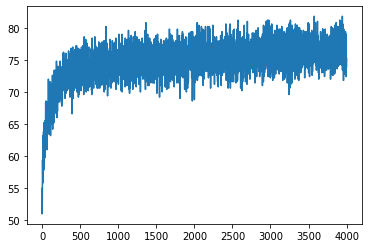

In [10]:
if __name__ == '__main__':
    agent=Agent(player_id=0)
    r=main(agent)
    plt.plot(r)


In [244]:
no_players=2
# random.seed(0)
epoch =1
env=Environment(no_players)
#     env.initialize()
#     agent=Agent(player_id=0)
ragent=maxagent(player_id=1)
# print(env.players)
p=np.zeros(no_players)
win_per=[]
print('hi')
for i in range(epoch):
    print(i)
    env.initialize()
    re=np.zeros((no_players))
    while(not env.terminate()):

        env.env_act()
        s=env.state()
        pos_actions=env.players[0][:]
        # print(pos_actions)
        a1=agent.greedy_action(s,env.players[0])
        env.player_act(a1,0)
        a2=max(env.players[1])
        env.player_act(a2,1)
        rwin,r=env.round_result()
        print(env.gold_card,a1,a2)
        if(rwin!=-1):
            re[rwin]+=r
            if(rwin==0):
                r=env.reward-a1
            else:
                r=(-1*env.reward)-a1
            sp=env.state()
            # print(s,sp)
            
            # print(pos_actions,env.players[0])
#             if (env.players[0]!=[]):
#                 agent.update_q(s,a1,sp,r,env.players[0],pos_actions)

    result=np.argmax(re)
    print(re,'\n',result)
# #         print(result,np.max(re))
#     p[result]+=1
#     if(i%500==0and i!=0):
#         per=(p[0]/500)*100
#         print(i,per,"%")
#         print(len(agent.q))
#         p=np.zeros(no_players)
#         win_per.append(per)

hi
0
5 3 13
4 13 12
6 12 11
1 11 10
13 10 9
10 9 8
7 8 7
3 7 6
8 6 5
11 5 4
9 4 3
2 1 2
12 2 1
[84.  7.] 
 0
